In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [3]:
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

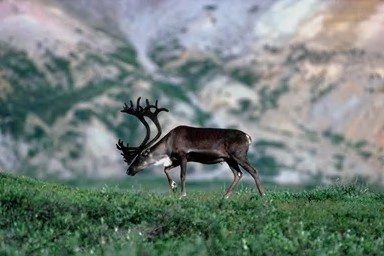

In [ ]:

real_image_path = '/content/gdrive/MyDrive/MP/dataset/test/Authentic/Au_ani_00024.jpg'
Image.open(real_image_path)

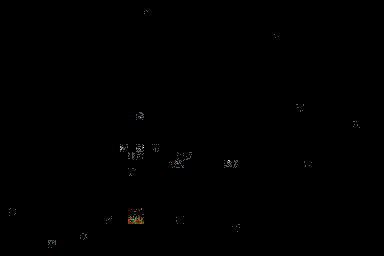

In [ ]:
convert_to_ela_image(real_image_path, 90)

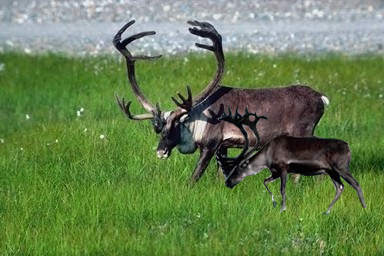

In [ ]:
fake_image_path = '/content/gdrive/MyDrive/MP/dataset/test/Doctored/Tp_D_CNN_M_N_ani00023_ani00024_10205.tif'
Image.open(fake_image_path)

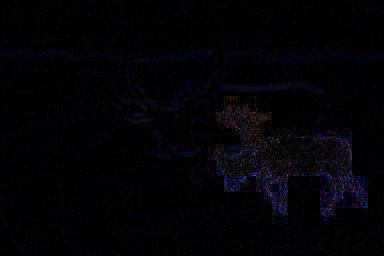

In [ ]:
convert_to_ela_image(fake_image_path, 90)

In [ ]:
image_size = (224, 224)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:
X = [] # ELA converted images
Y = [] # 0 for Doctored, 1 for Authentic

In [ ]:
import random
path = '/content/gdrive/MyDrive/MP/dataset/train/Authentic'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

random.shuffle(X)
X = X[:2100]
Y = Y[:2100]
print(len(X), len(Y))


Processing 500 images
Processing 1000 images
Processing 1500 images
Processing 2000 images
Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
2100 2100


In [ ]:
path = '/content/gdrive/MyDrive/MP/dataset/train/Doctored'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

print(len(X), len(Y))

Processing 2500 images
Processing 3000 images
3000 3000


In [ ]:
X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 224, 224, 3)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)
X = X.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

2400 2400
600 600


In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
def build_model():
  model = Sequential()
  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Flatten()) 
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=2, activation="softmax"))
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
epochs = 25
batch_size = 32

In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/25
75/75 [==============================] - 97s 615ms/step - loss: 0.6143 - accuracy: 0.6882 - val_loss: 0.4276 - val_accuracy: 0.7783
Epoch 2/25
75/75 [==============================] - 41s 548ms/step - loss: 0.3940 - accuracy: 0.8259 - val_loss: 0.3544 - val_accuracy: 0.8617
Epoch 3/25
75/75 [==============================] - 41s 554ms/step - loss: 0.3940 - accuracy: 0.8373 - val_loss: 0.3858 - val_accuracy: 0.8217
Epoch 4/25
75/75 [==============================] - 42s 558ms/step - loss: 0.3182 - accuracy: 0.8672 - val_loss: 0.3908 - val_accuracy: 0.8133
Epoch 5/25
75/75 [==============================] - 42s 563ms/step - loss: 0.3500 - accuracy: 0.8450 - val_loss: 0.3215 - val_accuracy: 0.8667
Epoch 6/25
75/75 [==============================] - 42s 563ms/step - loss: 0.3282 - accuracy: 0.8576 - val_loss: 0.3344 - val_accuracy: 0.8600
Epoch 7/25
75/75 [==============================] - 42s 563ms/step - loss: 0.2990 - accuracy: 0.8758 - val_loss: 0.3174 - val_accuracy: 0.8717

In [ ]:
model.save('/content/gdrive/MyDrive/MP/vgg16-ela_run1.h5')

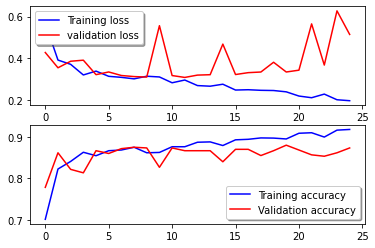

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [5]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from importlib import reload
from keras.applications import vgg16
from keras.applications.vgg16 import preprocess_input

data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

In [7]:
image_size=224
test_generator = data_generator.flow_from_directory('/content/gdrive/MyDrive/MP/dataset/test',target_size = (image_size , image_size),shuffle = False)
steps_per_epoch_test = len(test_generator)

Found 2523 images belonging to 2 classes.


In [9]:
from keras.models import load_model
vgg16_ela_saved = load_model("/content/gdrive/MyDrive/MP/vgg16-ela_run1.h5")

In [12]:
test_history = vgg16_ela_saved.evaluate(test_generator, steps=steps_per_epoch_test, verbose=1)
print("Accuracy: ",test_history[1])

79/79 [==============================] - 15s 187ms/step - loss: 0.6235 - accuracy: 0.6877
Accuracy:  0.6876733899116516


In [13]:
predict_vgg16_ela=vgg16_ela_saved.predict_generator(test_generator,steps=steps_per_epoch_test,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


79/79 [==============================] - 16s 191ms/step


In [14]:
len(predict_vgg16_ela)

2523

In [15]:
for i in range(0,len(predict_vgg16_ela)):
   Authentic = predict_vgg16_ela[i][0]
   Doctored = predict_vgg16_ela[i][1]
   if(Authentic > Doctored):
     print("Authentic")
   else:
     print("Doctored") 

Doctored
Authentic
Doctored
Authentic
Authentic
Doctored
Authentic
Doctored
Doctored
Authentic
Doctored
Authentic
Doctored
Doctored
Authentic
Doctored
Authentic
Doctored
Authentic
Doctored
Authentic
Doctored
Doctored
Doctored
Authentic
Doctored
Doctored
Authentic
Doctored
Doctored
Authentic
Authentic
Doctored
Doctored
Doctored
Doctored
Authentic
Authentic
Doctored
Authentic
Authentic
Doctored
Doctored
Doctored
Authentic
Doctored
Doctored
Doctored
Doctored
Doctored
Authentic
Doctored
Doctored
Authentic
Doctored
Doctored
Authentic
Doctored
Doctored
Authentic
Authentic
Doctored
Doctored
Doctored
Doctored
Doctored
Authentic
Doctored
Doctored
Authentic
Doctored
Authentic
Doctored
Doctored
Doctored
Doctored
Doctored
Authentic
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Authentic
Authentic
Doctored
Authentic
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Doctored
Authentic
Doctored
Authentic
Doctored
Doctored
Doctored
Auth

0.5901997 0.4098003
Authentic


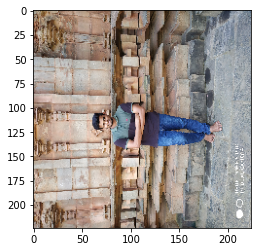

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
img = image.load_img("/content/gdrive/MyDrive/MP/samples/8.jpg",target_size=(224,224,3,1))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/gdrive/MyDrive/MP/vgg16-ela_run1.h5")
output = saved_model.predict(img)
print(output[0][0], output[0][1])
if output[0][0] > output[0][1]:
    print("Authentic")
else:
    print('Doctored')

In [17]:
import os
import tensorflow as tf
import numpy as np
from tensorflow import lite

tflite_model = tf.keras.models.load_model('/content/gdrive/MyDrive/MP/vgg16-ela_run1.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
tflite_save = converter.convert()
open("/content/gdrive/MyDrive/MP/tf_vgg16_ela.tflite", "wb").write(tflite_save)

INFO:tensorflow:Assets written to: /tmp/tmpe1gy5f4m/assets


58873948